In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\competitive-data-science-predict-future-sales\sales_train.csv')

In [7]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [10]:
train['item_price']   = train.item_price.abs()
train['item_cnt_day'] = train.item_cnt_day.abs()

In [11]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [12]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.247778e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.616391e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [13]:
train = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_price':'mean','item_cnt_day':'sum'}).reset_index()

In [14]:
train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0


In [15]:
train['shop_id'].value_counts()

31    99241
25    87977
54    70471
28    64639
57    59972
42    56861
27    48438
6     47250
56    43876
58    37954
21    36830
46    36659
19    36630
50    36203
35    34187
7     32700
26    32386
47    32033
15    31784
16    31303
30    30980
18    30594
53    30166
51    29890
24    29141
52    27855
29    27544
44    27085
38    26109
37    25699
41    25316
59    25088
22    24720
5     24108
4     23741
45    23156
14    22853
43    21720
12    20742
3     16827
2     15553
17    15125
10    14917
48    13580
55    12766
13    12105
49    11120
39     9781
32     5525
0      4821
23     4427
34     4135
33     3544
1      3282
8      2465
40     2235
9      1591
20      795
11      371
36      258
Name: shop_id, dtype: int64

In [16]:
test = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\competitive-data-science-predict-future-sales\test.csv')
test['date_block_num'] = 34
test= test[['date_block_num','shop_id','item_id']]

In [17]:
test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


In [18]:
item_price = dict(train.groupby('item_id')['item_price'].last().reset_index().values)
test['item_price'] = test.item_id.map(item_price)
print(test)


        date_block_num  shop_id  item_id  item_price
0                   34        5     5037      1499.0
1                   34        5     5320         NaN
2                   34        5     5233      1199.0
3                   34        5     5232      1199.0
4                   34        5     5268         NaN
...                ...      ...      ...         ...
214195              34       45    18454        99.0
214196              34       45    16188      1359.0
214197              34       45    15757       229.0
214198              34       45    19648        79.2
214199              34       45      969       198.0

[214200 rows x 4 columns]


<AxesSubplot:>

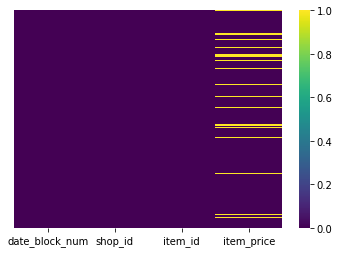

In [19]:
sns.heatmap(test.isna(),yticklabels=False,cmap='viridis')

In [20]:
test['item_price'] = test['item_price'].fillna(test['item_price'].median())

In [21]:
train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'], dtype='object')

In [22]:
test

,date_block_num,shop_id,item_id,item_price
0,34,5,5037,1499.0
1,34,5,5320,449.0
2,34,5,5233,1199.0
3,34,5,5232,1199.0
4,34,5,5268,449.0
...,...,...,...,...
214195,34,45,18454,99.0
214196,34,45,16188,1359.0
214197,34,45,15757,229.0
214198,34,45,19648,79.2


In [23]:
train

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


In [24]:
X = train.drop(['item_cnt_day'],axis=1)

In [25]:
y = train['item_cnt_day']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble  import RandomForestClassifier
poly_regs = PolynomialFeatures(degree=4)
X_poly = poly_regs.fit_transform(X)

In [27]:
from sklearn.svm import SVC

In [29]:
sv = SVC(X_pol)

In [ ]:
sv.fit()

In [49]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_poly,y)

In [31]:
LR = LinearRegression()

In [1]:
LR.fit(X_poly,y)

NameError: name 'LR' is not defined

In [36]:
poly_preds = LR.predict(poly_regs.fit_transform(test))

In [37]:
poly_preds

array([2.05244503, 1.85094788, 2.03505008, ..., 1.61012889, 2.42606515,
       0.28836098])

In [38]:
test.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price'], dtype='object')

In [40]:
train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'], dtype='object')

In [42]:
df1 = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\competitive-data-science-predict-future-sales\test.csv')

In [43]:
df1.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [44]:
submission = pd.DataFrame({
    "Id" : df1['ID'],
    "item_cnt_month" :   poly_preds
})

In [45]:
submission.to_csv('Future_Month_Sales_submission_v03.csv', index=False)